<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтобы результат был повторимым и предсказуемым

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train_preprocess = df_train.copy()
df_test_preprocess = df_test.copy()

In [4]:
df_train_preprocess.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [5]:
df_test_preprocess.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [6]:
df_test_preprocess.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [7]:
missing_values = df_train_preprocess.isnull().sum()
print(f'Колонки с пропусками в тренировочном датасете:\n{missing_values[missing_values > 0]}')
missing_values = df_test_preprocess.isnull().sum()
print(f'Колонки с пропусками в тестовом датасете:\n{missing_values[missing_values > 0]}')

Колонки с пропусками в тренировочном датасете:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64
Колонки с пропусками в тестовом датасете:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64


In [8]:
duplicates = df_train_preprocess.duplicated().sum()
print(f"Число дубликатов в тренировочном датасете: {duplicates}")
duplicates = df_test_preprocess.duplicated().sum()
print(f"Число дубликатов в тестовом датасете: {duplicates}")

Число дубликатов в тренировочном датасете: 985
Число дубликатов в тестовом датасете: 62


In [9]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train_preprocess, title="Дашборд для датасета", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile.to_file("data_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [11]:
def fill_missing_values(df, reference_df):
    for col in df.columns:
        if df[col].dtype == 'object': 
            df[col] = df[col].fillna('')
        else:
            df[col] = df[col].fillna(reference_df[col].median())
    return df

df_train_preprocess = fill_missing_values(df_train_preprocess, df_train_preprocess)
df_test_preprocess = fill_missing_values(df_test_preprocess, df_train_preprocess)

missing_train_filled = df_train_preprocess.isnull().sum()
missing_test_filled = df_test_preprocess.isnull().sum()

print(f"Пропуски в тренировочном датасете:\n{missing_train_filled[missing_train_filled > 0]}")
print(f"Пропуски в тестовом датасете:\n{missing_test_filled[missing_test_filled > 0]}")

Пропуски в тренировочном датасете:
Series([], dtype: int64)
Пропуски в тестовом датасете:
Series([], dtype: int64)


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [12]:
df_train_preprocess_no_price = df_train_preprocess.drop(columns=['selling_price'])
duplicates = df_train_preprocess_no_price.duplicated()
duplicate_count = duplicates.sum()

print(f"Количество объектов с одинаковым признаковым описанием: {duplicate_count}")

Количество объектов с одинаковым признаковым описанием: 1159


In [13]:
duplicate_rows = df_train_preprocess[duplicates]
duplicate_rows

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [14]:
df_train_preprocess = df_train_preprocess.drop_duplicates(subset=df_train_preprocess_no_price.columns, keep='first')
print(f"Количество строк в train после удаления дубликатов: {df_train_preprocess.shape[0]}")

Количество строк в train после удаления дубликатов: 5840


In [15]:
df_train_preprocess.reset_index(drop=True, inplace=True)
df_train_preprocess

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [16]:
assert df_train_preprocess.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [17]:
df_train_preprocess.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [18]:
def prepare_df(df):
    df = df.copy()
    df['mileage'] = df['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '')
    df['mileage'] = df['mileage'].replace('', np.nan)
    df['mileage'] = df['mileage'].astype(float)
    df['engine'] = df['engine'].str.replace(' CC', '')
    df['engine'] = df['engine'].replace('', np.nan)
    df['engine'] = df['engine'].astype(float)
    df['max_power'] = df['max_power'].str.replace(' bhp', '')
    df['max_power'] = df['max_power'].replace('', np.nan)
    df['max_power'] = df['max_power'].astype(float)
    df.drop(columns=['torque'], inplace=True)
    return df

In [19]:
df_train_preprocess = prepare_df(df_train_preprocess)
df_train_preprocess

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.40  1248.0   
1     Diesel  Individual       Manual          Second Owner    21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.00  1396.0   
3     Petrol  Individual       Manual           First Owner    16.10  1298.0   
4     Petrol  Individual       Manual           First Owner    20.14  1197.0   
...      ...         ...          ...                   ...      ...     ...   
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  seats  
0         74.00    5.0  
1        103.52    5.0  
2         90.00    5.0  
3         88.20    5.0  
4         81.86    5.0  
...         ...    ...  
5835      62.10    5.0  
5836      67.10    5.0  
5837      82.85    5.0  
5838     110.00    5.0  
5839      73.90    5.0  

[5840 rows x 12 columns]

In [20]:
df_train_preprocess.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [21]:
df_test_preprocess = prepare_df(df_test_preprocess)
df_test_preprocess

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00  2498.0   
1    Diesel  Individual       Manual   First Owner    21.50  1497.0   
2    Petrol  Individual    Automatic   First Owner    12.90  1799.0   
3    Diesel  Individual       Manual   First Owner    25.10  1498.0   
4    Petrol  Individual       Manual  Second Owner    16.50  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81  1086.0   
996  Petrol  Individual       Manual  Second Owner    18.60  1197.0   
997  Diesel  Individual       Manual   First Owner    23.00  1396.0   
998  Petrol  Individual       Manual   First Owner    20.36  1197.0   
999  Diesel  Individual       Manual   First Owner    26.00  1498.0   

     max_power  seats  
0       112.00    7.0  
1       108.50    5.0  
2       130.00    5.0  
3        98.60    5.0  
4        65.00    5.0  
..         ...    ...  
995      68.05    5.0  
996      81.83    5.0  
997      90.00    5.0  
998      78.90    5.0  
999      98.60    5.0  

[1000 rows x 12 columns]

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [22]:
df_train_preprocess = fill_missing_values(df_train_preprocess, df_train_preprocess)
df_test_preprocess = fill_missing_values(df_test_preprocess, df_train_preprocess)

In [23]:
df_train_preprocess['engine'] = df_train_preprocess['engine'].astype(int)
df_train_preprocess['seats'] = df_train_preprocess['seats'].astype(int)
df_test_preprocess['engine'] = df_test_preprocess['engine'].astype(int)
df_test_preprocess['seats'] = df_test_preprocess['seats'].astype(int)

In [24]:
df_test_preprocess

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner    14.00    2498   
1    Diesel  Individual       Manual   First Owner    21.50    1497   
2    Petrol  Individual    Automatic   First Owner    12.90    1799   
3    Diesel  Individual       Manual   First Owner    25.10    1498   
4    Petrol  Individual       Manual  Second Owner    16.50    1172   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner    19.81    1086   
996  Petrol  Individual       Manual  Second Owner    18.60    1197   
997  Diesel  Individual       Manual   First Owner    23.00    1396   
998  Petrol  Individual       Manual   First Owner    20.36    1197   
999  Diesel  Individual       Manual   First Owner    26.00    1498   

     max_power  seats  
0       112.00      7  
1       108.50      5  
2       130.00      5  
3        98.60      5  
4        65.00      5  
..         ...    ...  
995      68.05      5  
996      81.83      5  
997      90.00      5  
998      78.90      5  
999      98.60      5  

[1000 rows x 12 columns]

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [25]:
print("Статистики числовых столбцов в train до заполнения пропусков:")
df_train.describe(include=[np.number])

Статистики числовых столбцов в train до заполнения пропусков:


year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [26]:
print("Статистики числовых столбцов в train после заполнения пропусков:")
df_train_preprocess.describe(include=[np.number])

Статистики числовых столбцов в train после заполнения пропусков:


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [27]:
print("Статистики категориальных столбцов в train:")
df_train.describe(include=['object'])

Статистики категориальных столбцов в train:


name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [28]:
print("Статистики категориальных столбцов в train после заполнения пропусков:")
df_train_preprocess.describe(include=['object'])

Статистики категориальных столбцов в train после заполнения пропусков:


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [29]:
print("Статистики числовых столбцов в test до заполнения пропусков:")
df_test.describe(include=[np.number])

Статистики числовых столбцов в test до заполнения пропусков:


year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [30]:
print("Статистики числовых столбцов в test после заполнения пропусков:")
df_test_preprocess.describe(include=[np.number])

Статистики числовых столбцов в test после заполнения пропусков:


year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [31]:
print("Статистики категориальных столбцов в test:")
df_test.describe(include=['object'])

Статистики категориальных столбцов в test:


name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [32]:
print("Статистики категориальных столбцов в test после заполнения пропусков:")
df_test_preprocess.describe(include=['object'])

Статистики категориальных столбцов в test после заполнения пропусков:


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [33]:
assert df_train_preprocess.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [34]:
%matplotlib inline

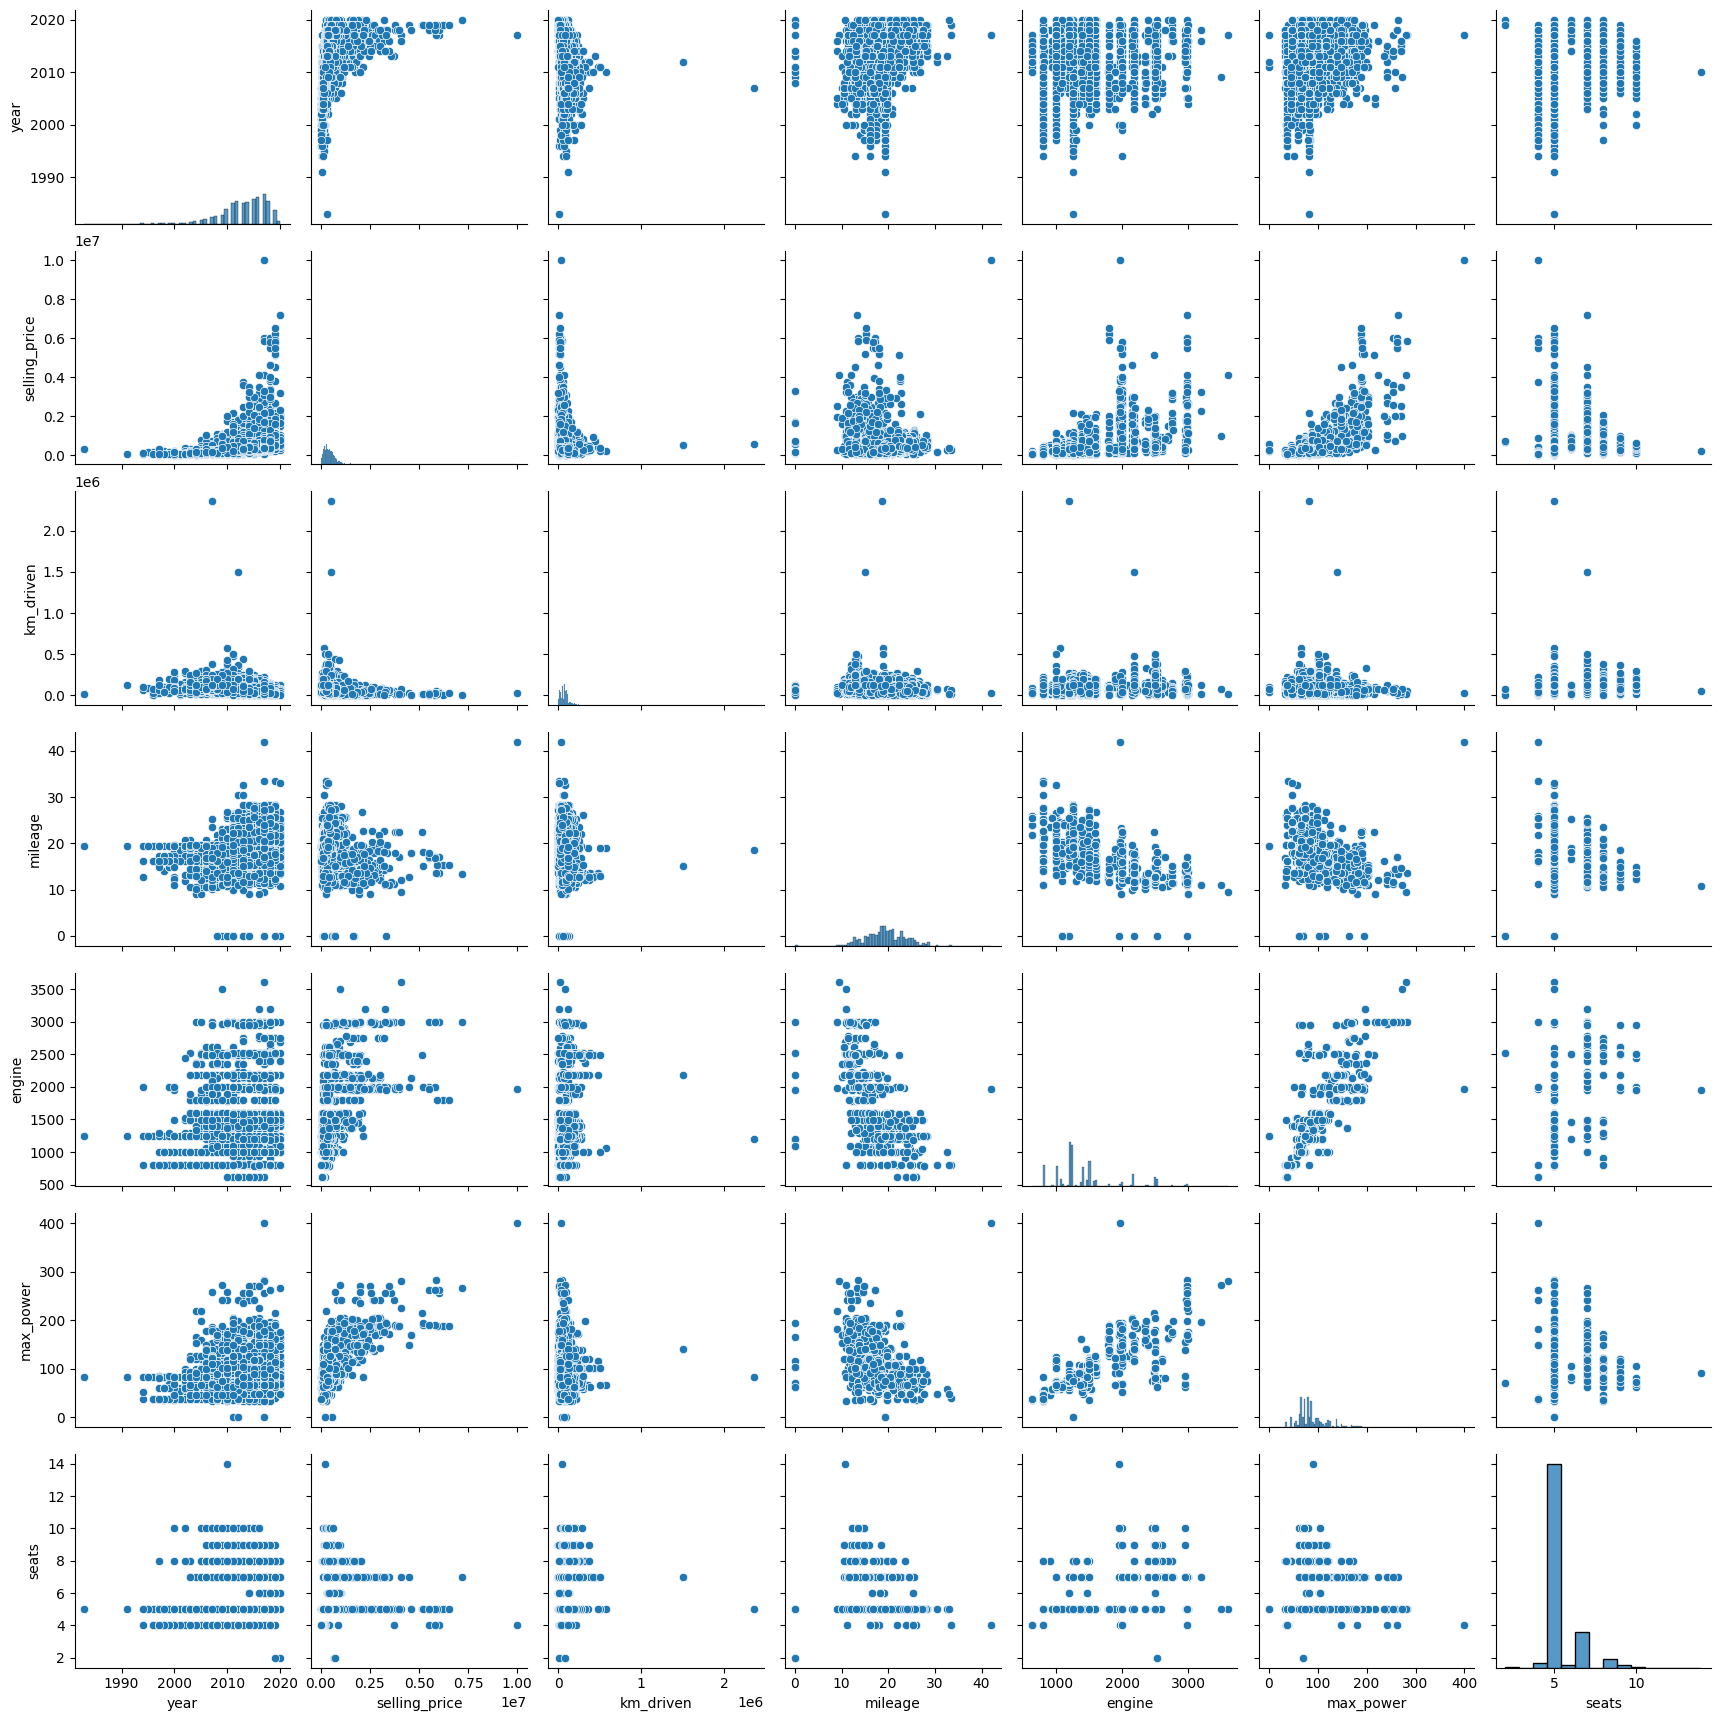

In [35]:
sns.pairplot(df_train_preprocess)
plt.show()

- Можно предположить на основе распределений связь признаков с целевой переменной. Так как можно наблюдать разделение признаков по группам, в зависимости от цены.
- Можно предположить, что год переменные `year`, `max_power` обладают положительной корреляцией с ценой продажи. Однако, данные предположения могут не соответствовать действительности, тредбуется расчитать корреляцию

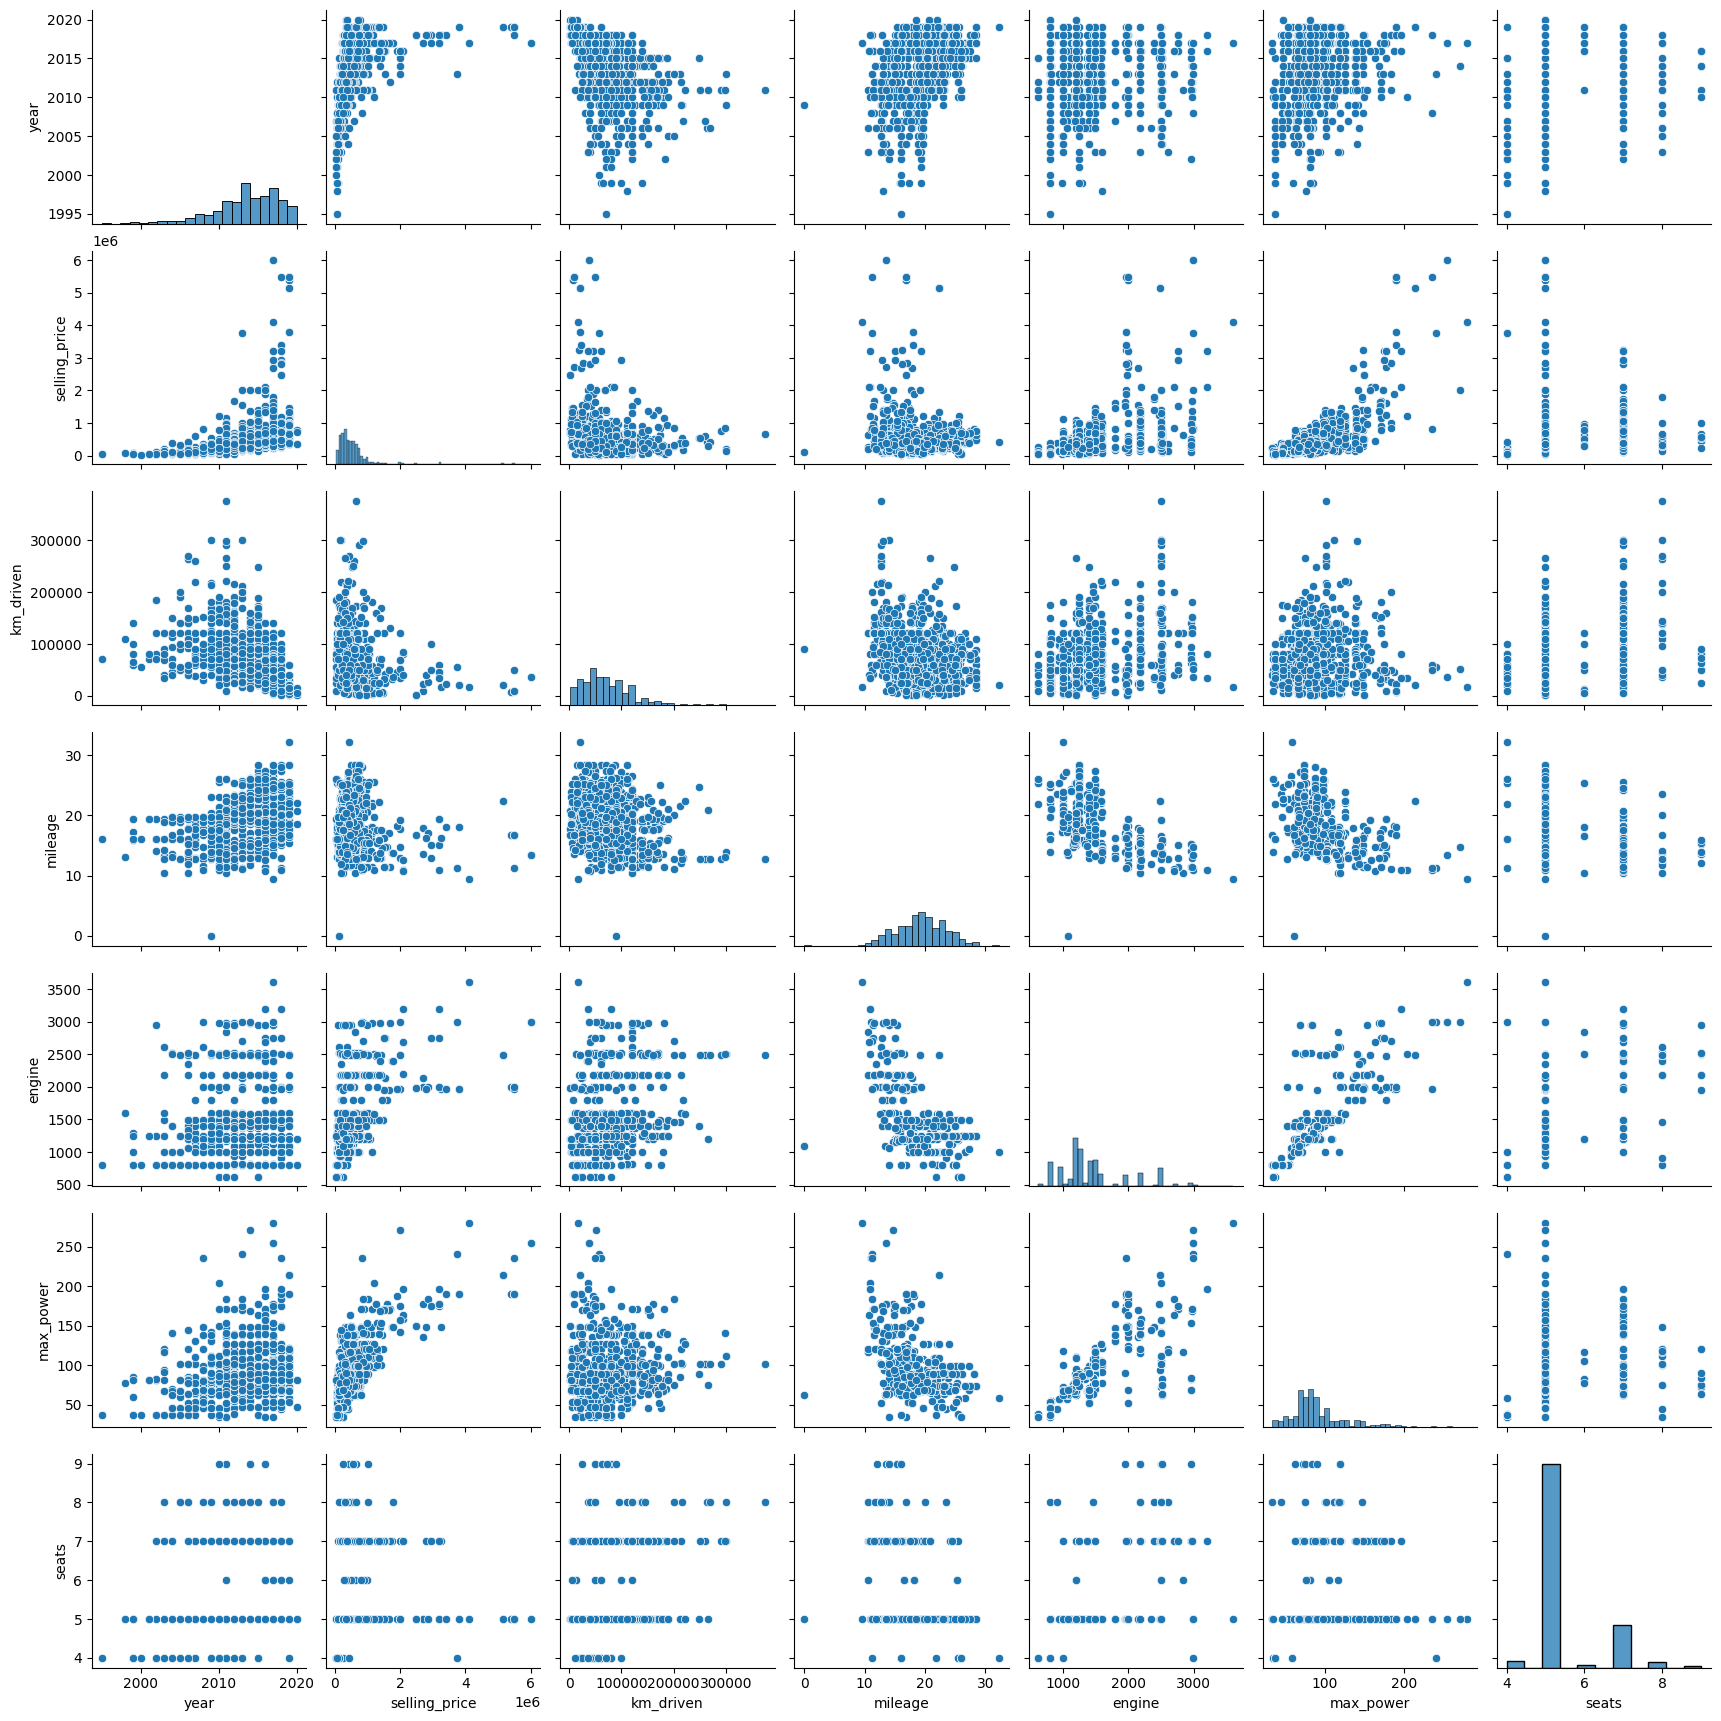

In [36]:
sns.pairplot(df_test_preprocess)
plt.show()

Совокупности при разделении на трейн и тест оказались похожими

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [37]:
df_train_preprocess.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [38]:
num_cols = df_train_preprocess.select_dtypes(include=["float64", "int64"])
correlation_matrix = num_cols.corr()
correlation_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000

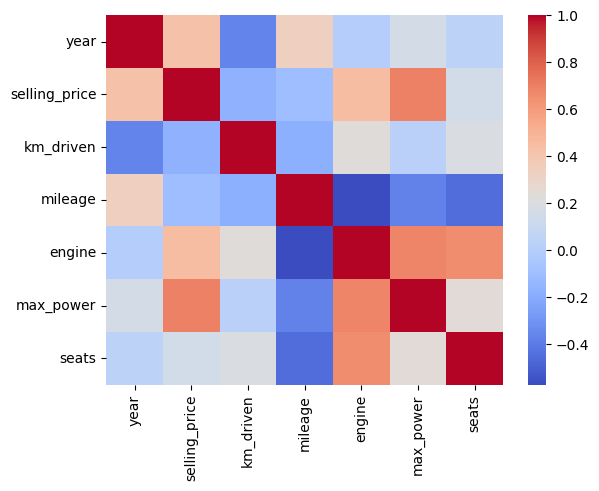

In [39]:
sns.heatmap(correlation_matrix, cmap="coolwarm", cbar=True)
plt.show()

In [40]:
corr = correlation_matrix.abs().min().min()
col = correlation_matrix.abs().min().idxmin()
print(f'Наименьшая корреляция по модулю ({corr:.4f}): {col} и {correlation_matrix.abs().idxmin()[col]}')

Наименьшая корреляция по модулю (0.0028): year и engine


In [41]:
temp_correlation_matrix = correlation_matrix.copy()
np.fill_diagonal(temp_correlation_matrix.values, np.nan)

corr = temp_correlation_matrix.abs().max().max()
col = temp_correlation_matrix.max().idxmax()
print(f'Наибольшая положительная корреляция ({corr:.4f}): {col} и {temp_correlation_matrix.idxmax()[col]}')

Наибольшая положительная корреляция (0.6928): selling_price и max_power


In [42]:
correlation_year_mileage = num_cols['year'].corr(num_cols['mileage'])

print(f"Корреляция между годом выпуска ({'year'}) и пробегом ({'mileage'}): {correlation_year_mileage:.2f}")

Корреляция между годом выпуска (year) и пробегом (mileage): 0.34


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- Наименьшая корреляция по модулю (0.0028): year и engine
- Наибольшая положительная корреляция (0.6928): selling_price и max_power
- Опираясь на данные нельзя утверждать, что ем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи, так как коэф корреляции положительный

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [43]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [44]:
df_train_preprocess.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [45]:
num_cols_train = df_train_preprocess.select_dtypes(include=["float64", "int64"]).copy()
num_cols_test = df_test_preprocess.select_dtypes(include=["float64", "int64"]).copy()

In [46]:
y_train = num_cols_train['selling_price']
X_train = num_cols_train.drop(columns=['selling_price'])

In [47]:
assert X_train.shape == (5840, 6)

In [48]:
y_test = num_cols_test['selling_price']
X_test = num_cols_test.drop(columns=['selling_price'])

In [49]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.5941
MSE: 233298779730.4587


- R^2 = 0.5941 говорит о том, что качество модели среднее и 59.41% разброса в данных может быть объяснено
- MSE = 233298779730.4587 говорит о том, что ожидаемая разница между прогнозным значением и фактическим значением очень велика. Это может из-за больших значений переменных (можно попробовать масштабировать) или низкого качества предсказания

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.5941
MSE: 233298779730.4496


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [53]:
coeff_df = pd.DataFrame({
    'Признак': X_train.columns,
    'Коэффициент': lin_reg.coef_
})

important_feature = coeff_df.loc[coeff_df['Коэффициент'].abs().idxmax()]

print(f"наиболее информативным в предсказании цены оказался признак: {important_feature['Признак']} с коэффициентом: {important_feature['Коэффициент']:.4f}")

наиболее информативным в предсказании цены оказался признак: max_power с коэффициентом: 322807.3533


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mse = MSE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')
coefs = lasso.coef_
print()
print("Коэффициенты:")
for feature, coef in zip(X_train.columns, coefs):
    print(f"{feature}: {coef:.4f}")

R2: 0.5941
MSE: 233299450599.1693

Коэффициенты:
year: 152772.3902
km_driven: -44157.6899
mileage: 28832.0434
engine: 61173.6624
max_power: 322808.2369
seats: -23206.2556


L1-регуляризация с параметрами по умолчанию не занулила веса. 
Это может быть связано с тем, что значение alpha по умолчанию = 1 (Константа, умножающая член L1 и контролирующая силу регуляризации)

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [55]:
from sklearn.model_selection import GridSearchCV

lass = Lasso()
params = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
    }
grid_search = GridSearchCV(lass, params, cv=10, n_jobs=-1, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
y_pred = grid_search.predict(X_test_scaled)
mse = MSE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

R2: 0.5816
MSE: 240511826990.2260


In [56]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'Лучший параметры: {best_params}')
print()
print("Коэффициенты:")
for feature, coef in zip(X_train.columns, best_model.coef_):
    print(f"{feature}: {coef:.4f}")

Лучший параметры: {'alpha': 10000}

Коэффициенты:
year: 151810.9839
km_driven: -32735.1136
mileage: 9285.9979
engine: 17841.6223
max_power: 329230.1476
seats: -0.0000


- грид-сёрчу пришлось обучать 160 моделей
- коэффициент регуляризации у лучшей из перебранных моделей = 10000. Веса seats занулились

**Проблема**

Найденные гиперпараметры показали результат хуже, чем без их использования. Если использовать выборку без масштабирования, то выбираются параметры по умолчанию. Возможно, это связано с переобучением на тренировочной выборке

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [57]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()
params = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'l1_ratio': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 0.95]
    }
grid_search = GridSearchCV(en, params, cv=10, n_jobs=-1, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
y_pred = grid_search.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)

print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.4f}')

Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9}
R2: 0.5722
MSE: 245894595583.2367


In [58]:
en = ElasticNet()
en.fit(X_train_scaled, y_train)
y_pred = en.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)

print(f'R2 стандартный: {r2:.4f}')
print(f'MSE стандартный: {mse:.4f}')

R2 стандартный: 0.4940
MSE стандартный: 290874664814.2062


- грид-сёрчу пришлось обучать 720 моделей
- Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9}

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [59]:
df_train_cat = df_train_preprocess.drop(columns=['name']).select_dtypes(exclude=['int64', 'float64'])
df_test_cat = df_test_preprocess.drop(columns=['name']).select_dtypes(exclude=['int64', 'float64'])

In [60]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object')

In [61]:
df_train_cat.columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [62]:
X_train_cat = pd.merge(X_train, df_train_cat, left_index=True, right_index=True, how='inner')
X_train_cat

year  km_driven  mileage  engine  max_power  seats    fuel seller_type  \
0     2014     145500    23.40    1248      74.00      5  Diesel  Individual   
1     2014     120000    21.14    1498     103.52      5  Diesel  Individual   
2     2010     127000    23.00    1396      90.00      5  Diesel  Individual   
3     2007     120000    16.10    1298      88.20      5  Petrol  Individual   
4     2017      45000    20.14    1197      81.86      5  Petrol  Individual   
...    ...        ...      ...     ...        ...    ...     ...         ...   
5835  2008     191000    17.92    1086      62.10      5  Petrol  Individual   
5836  2013      50000    18.90     998      67.10      5  Petrol  Individual   
5837  2013     110000    18.50    1197      82.85      5  Petrol  Individual   
5838  2007     119000    16.80    1493     110.00      5  Diesel  Individual   
5839  2009     120000    19.30    1248      73.90      5  Diesel  Individual   

     transmission                 owner  
0          Manual           First Owner  
1          Manual          Second Owner  
2          Manual           First Owner  
3          Manual           First Owner  
4          Manual           First Owner  
...           ...                   ...  
5835       Manual           First Owner  
5836       Manual          Second Owner  
5837       Manual           First Owner  
5838       Manual  Fourth & Above Owner  
5839       Manual           First Owner  

[5840 rows x 10 columns]

In [63]:
X_test_cat = pd.merge(X_test, df_test_cat, left_index=True, right_index=True, how='inner')
X_test_cat

year  km_driven  mileage  engine  max_power  seats    fuel seller_type  \
0    2010     168000    14.00    2498     112.00      7  Diesel  Individual   
1    2017      25000    21.50    1497     108.50      5  Diesel  Individual   
2    2007     218463    12.90    1799     130.00      5  Petrol  Individual   
3    2015     173000    25.10    1498      98.60      5  Diesel  Individual   
4    2011      70000    16.50    1172      65.00      5  Petrol  Individual   
..    ...        ...      ...     ...        ...    ...     ...         ...   
995  2008     100000    19.81    1086      68.05      5  Petrol  Individual   
996  2017      50000    18.60    1197      81.83      5  Petrol  Individual   
997  2009      40000    23.00    1396      90.00      5  Diesel  Individual   
998  2012      25000    20.36    1197      78.90      5  Petrol  Individual   
999  2016     110000    26.00    1498      98.60      5  Diesel  Individual   

    transmission         owner  
0         Manual   First Owner  
1         Manual   First Owner  
2      Automatic   First Owner  
3         Manual   First Owner  
4         Manual  Second Owner  
..           ...           ...  
995       Manual  Second Owner  
996       Manual  Second Owner  
997       Manual   First Owner  
998       Manual   First Owner  
999       Manual   First Owner  

[1000 rows x 10 columns]

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [64]:
df_train['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Hyundai i20 Sportz Diesel', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [65]:
assert X_train_cat.shape == (5840, 10)

In [66]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [67]:
X_train

year  km_driven  mileage  engine  max_power  seats
0     2014     145500    23.40    1248      74.00      5
1     2014     120000    21.14    1498     103.52      5
2     2010     127000    23.00    1396      90.00      5
3     2007     120000    16.10    1298      88.20      5
4     2017      45000    20.14    1197      81.86      5
...    ...        ...      ...     ...        ...    ...
5835  2008     191000    17.92    1086      62.10      5
5836  2013      50000    18.90     998      67.10      5
5837  2013     110000    18.50    1197      82.85      5
5838  2007     119000    16.80    1493     110.00      5
5839  2009     120000    19.30    1248      73.90      5

[5840 rows x 6 columns]

In [68]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_cols = list(X_train_cat.select_dtypes(include='object').columns)
cat_cols.append('seats')


encoder = OneHotEncoder(drop='first')
X_train_encoded = encoder.fit_transform(X_train_cat[cat_cols])
X_test_encoded = encoder.transform(X_test_cat[cat_cols])
print(X_train_encoded.shape)
print(X_test_encoded.shape)


(5840, 18)
(1000, 18)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [69]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


ridge = Ridge()
params = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]
}
grid_search = GridSearchCV(ridge, params, cv=10, n_jobs=-1, scoring='r2')
grid_search.fit(X_train_encoded, y_train)
print(f'Лучшие параметры: {grid_search.best_params_}')
y_pred = grid_search.predict(X_test_encoded)

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')

Лучшие параметры: {'alpha': 10}
R2: 0.4169


In [70]:
ridge = Ridge()
ridge.fit(X_train_encoded, y_train)
y_pred = ridge.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')

R2: 0.4055


In [71]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')

R2: 0.5941


In [72]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')

R2: 0.5941


In [73]:
ridge = Ridge()
params = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]
}
grid_search = GridSearchCV(ridge, params, cv=10, n_jobs=-1, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print(f'Лучшие параметры: {grid_search.best_params_}')
y_pred = grid_search.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.4f}')

Лучшие параметры: {'alpha': 1000}
R2: 0.5570


Качество прогнозов улучшить не удалось((

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [74]:
def business_metric(y_true, y_pred):
    percent_diff = np.abs((y_true - y_pred) / y_true)
    return np.mean(percent_diff <= 0.1)


business_metric(y_test, y_pred)

np.float64(0.247)

In [75]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print(f'Для линейной регрессии: {business_metric(y_test, y_pred_lr)}')

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print(f'Для ridge: {business_metric(y_test, y_pred_ridge)}')

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print(f'Для lasso: {business_metric(y_test, y_pred_lasso)}')

en = ElasticNet()
en.fit(X_train_scaled, y_train)
y_pred_en = en.predict(X_test_scaled)
print(f'Для ElasticNet: {business_metric(y_test, y_pred_en)}')

Для линейной регрессии: 0.227
Для ridge: 0.227
Для lasso: 0.227
Для ElasticNet: 0.254


Лучший результат для бизнеса у модели `ElasticNet`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [76]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

Сохранение модели

In [77]:
import pickle
from sklearn.linear_model import LinearRegression


model = LinearRegression() 
model.fit(X_train_scaled, y_train)

with open('model_scaler.pickle', 'wb') as f:
    pickle.dump({
        'model': model,
        'scaler': scaler,
        'model_params': model.get_params(),
        'scaler_mean': scaler.mean_,
        'scaler_scale': scaler.scale_,
    }, f)

In [79]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
df_test.to_csv('test.csv')

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

